In [1]:
#Titanic survived Project

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('C:/Users/Sayan Mondal/Downloads/titanic_train.csv')

In [13]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
average_age = df['Age'].mean()

# Replace missing values in the 'Age' column with the average age
df['Age'].fillna(average_age, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Embarked', axis=1, inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

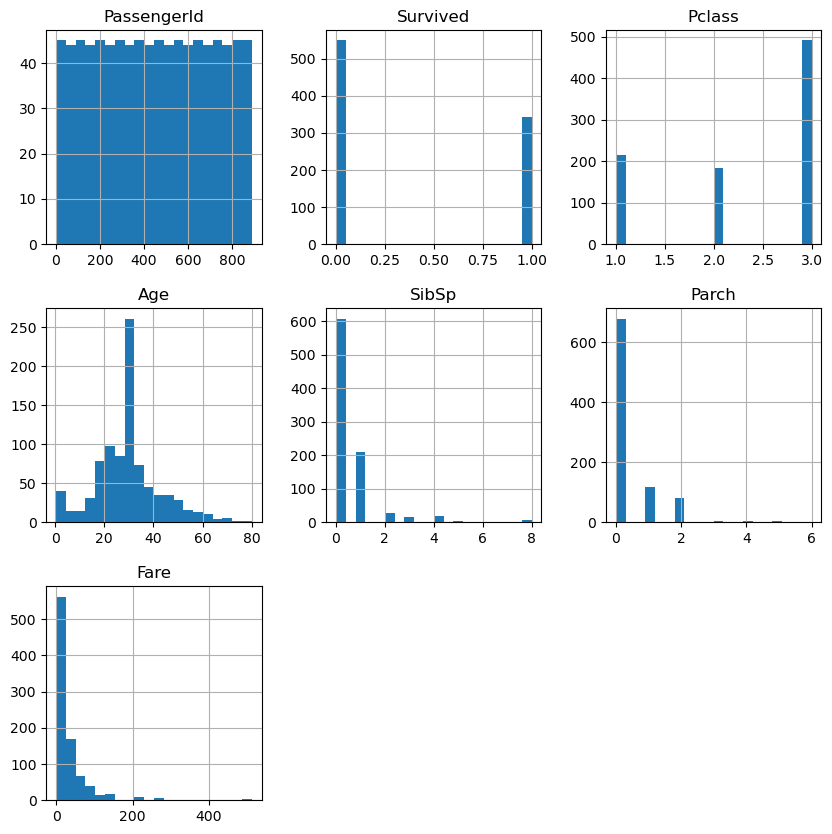

In [18]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

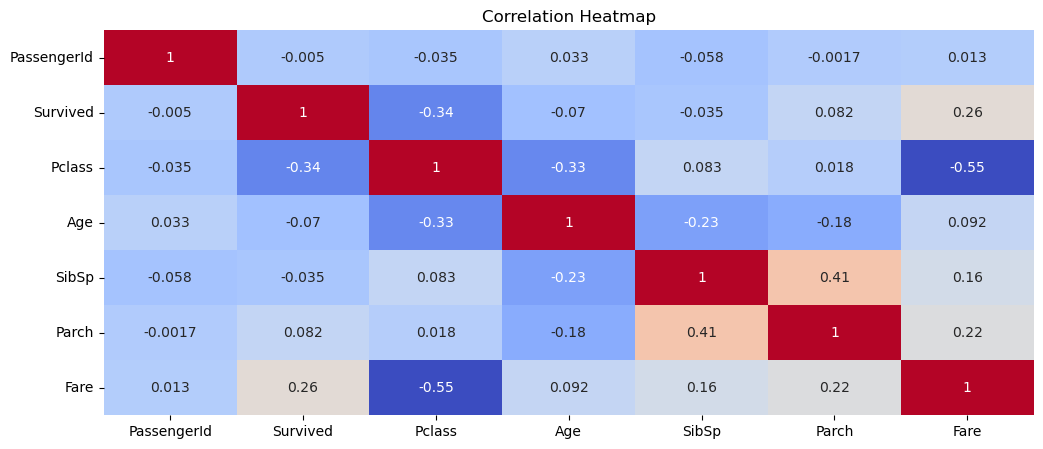

In [19]:
plt.figure(figsize=(12, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap')

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [21]:
# Define features (X) and target variable (y)
X = df.drop('Survived', axis=1)
Y = df['Survived']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

[ 0.08026352  0.25292091  0.16926453  0.86935249  1.07709304  0.76288329
  0.60848407 -0.17567712  0.67426988  0.93246215  0.42510293  0.04310072
  0.26879797  0.09699062  0.22537798  0.9981483   0.35527318  0.6213112
  0.29045364  0.11540857  0.12938793  0.39772017  0.63850907  0.16425486
  0.11245941 -0.30686182  0.35283565  0.26253591 -0.30400613  0.6054351
  0.17578375  0.64155997  0.43385229  0.60602505  0.15647711  0.10893372
  0.41665225  0.60477634  0.73443008  0.11677747  0.06161517  0.09028405
  0.12040034  0.11856115  0.18468402 -0.31307015  0.14654249  0.13707391
  0.12605785  0.29712326  0.92802175  0.84033158 -0.47197907  0.69832652
 -0.07810153  0.92626159  0.23448787  0.64162438  0.73687852  0.65324906
  0.14866897  0.99238458  0.76217905  0.40902507  0.09700145  0.46984928
  0.10009074  0.10879398  0.13434503  0.9182804   0.74949022  1.00475242
  0.45571607  0.88098473  0.15393564  0.06344992  0.62137535  0.94241003
  0.72343331  0.45252209 -0.09044803  0.75717156  0.9

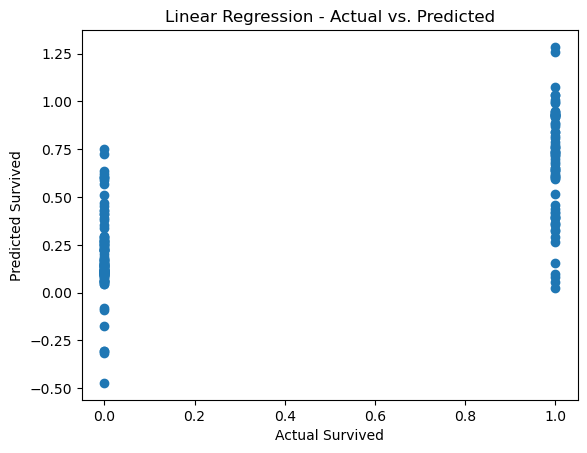

In [23]:
# Implementing Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predicting on the test set
Y_pred1 = regressor.predict(X_test)
print(Y_pred1)
# Calculation of error for linear Regression
import sklearn.metrics as sm
print("Mean absolute error for LinearRegression=", round(sm.mean_absolute_error(Y_test, Y_pred1), 2))  
print("Median absolute error for LinearRegression=", round(sm.median_absolute_error(Y_test, Y_pred1), 2)) 
print("Explain variance score for LinearRegression=", round(sm.explained_variance_score(Y_test, Y_pred1), 2)) 
print("R2 score for Linear Regression =", round(sm.r2_score(Y_test, Y_pred1), 2))
plt.scatter(Y_test, Y_pred1)
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Linear Regression - Actual vs. Predicted')
plt.show()

Mean absolute error for DecisionTreeRegression= 0.18
Median absolute error for DecisionTreeRegression= 0.0
Explain variance score for DecisionTreeRegression= 0.28
R2 score for DecisionTreeRegression = 0.26


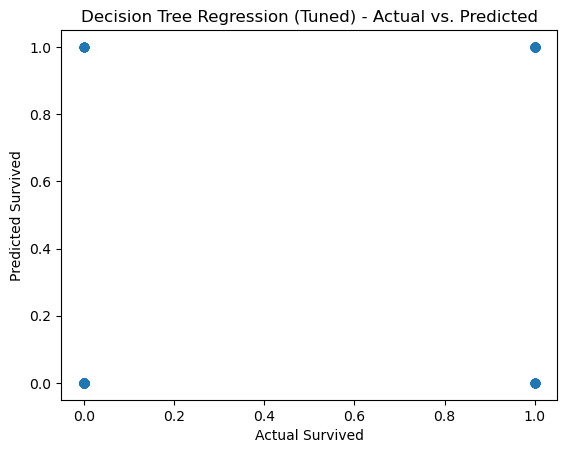

In [24]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)
Y_pred2 = tree_model.predict(X_test)
print("Mean absolute error for DecisionTreeRegression=", round(sm.mean_absolute_error(Y_test, Y_pred2), 2))  
print("Median absolute error for DecisionTreeRegression=", round(sm.median_absolute_error(Y_test, Y_pred2), 2)) 
print("Explain variance score for DecisionTreeRegression=", round(sm.explained_variance_score(Y_test, Y_pred2), 2)) 
print("R2 score for DecisionTreeRegression =", round(sm.r2_score(Y_test, Y_pred2), 2))
plt.scatter(Y_test, Y_pred2)
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Decision Tree Regression (Tuned) - Actual vs. Predicted')
plt.show()

Mean absolute error for RandomForestRegression= 0.2
Median absolute error for RandomForestRegression= 0.0
Explain variance score for RandomForestRegression= 0.41
R2 score for RandomForestRegression = 0.39


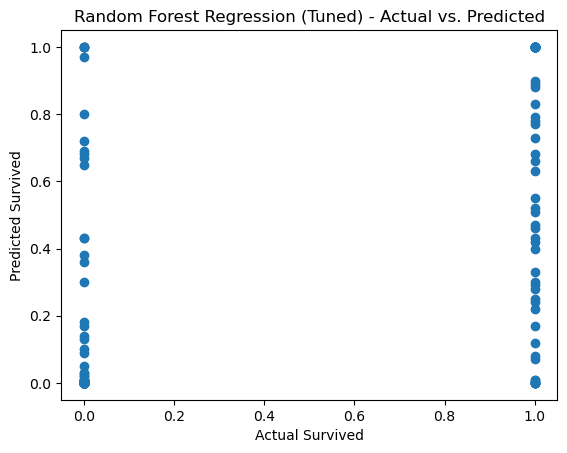

In [26]:
# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, Y_train)
Y_pred3 = forest_model.predict(X_test)
print("Mean absolute error for RandomForestRegression=", round(sm.mean_absolute_error(Y_test, Y_pred3), 2))  
print("Median absolute error for RandomForestRegression=", round(sm.median_absolute_error(Y_test, Y_pred2), 2)) 
print("Explain variance score for RandomForestRegression=", round(sm.explained_variance_score(Y_test, Y_pred3), 2)) 
print("R2 score for RandomForestRegression =", round(sm.r2_score(Y_test, Y_pred3), 2))
plt.scatter(Y_test, Y_pred3)
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Random Forest Regression (Tuned) - Actual vs. Predicted')
plt.show()